## Implementation

# Data Understanding



Import Libraries
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [2]:
data = pd.read_csv("Data.csv",nrows=58)
data

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score
0,1,Nouran khaled,Female,Cs,Senior Student,21,3.0,2.0,4.0,5.0,...,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.0,5.0,Green
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.0,9.0,Blue
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.0,7.0,Green
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.5,9.0,Blue
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,4.0,8.0,6.0,7.0,6.0,8.0,NaN,NaN,Green
5,6,Abdelraouf Khorshed,Male,CS,Student,19,5.0,3.0,4.0,2.0,...,7.0,3.0,5.0,7.0,6.0,6.0,7.0,NaN,NaN,Blue
6,7,Mohamed Osama,Male,CS,Student,20,4.0,4.0,2.0,1.0,...,8.5,6.5,7.0,9.0,9.0,8.0,9.0,NaN,NaN,Gold
7,8,Shahd Khattab,Female,CS,Student,19,4.0,2.0,3.0,3.0,...,6.0,8.0,5.0,6.0,8.0,7.0,10.0,NaN,NaN,Gold
8,9,Jumana Amr,Female,CS,Student,20,5.0,5.0,4.0,4.0,...,9.0,7.0,5.0,9.0,9.0,9.0,10.0,NaN,NaN,Orange
9,10,Jouanna Tadros,Female,CS,Student,21,3.0,2.0,4.0,3.0,...,9.0,8.0,6.0,7.0,8.0,9.0,8.0,NaN,NaN,Orange


In [3]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism            int64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Extra_interface_1    float64
Extra_interface_2    float64
Test_Score            object
dtype: object

In [4]:
# data['Interface_9'] = data['Interface_9'].astype('float64')


In [5]:

# data['Neuroticism'] = data['Neuroticism'].astype('float64')

In [6]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                    0.000000
Name                  0.000000
Gender                0.000000
Field                 0.000000
Occupation            0.000000
Age                   0.000000
Openness              0.000000
Extraversion          0.000000
Agreeableness         0.000000
Conscientiousness     0.000000
Neuroticism           0.000000
Interface_1           0.000000
Interface_2           0.000000
Interface_3           0.000000
Interface_4           0.000000
Interface_5           0.000000
Interface_6           0.000000
Interface_7           0.000000
Interface_8           0.000000
Interface_9           0.000000
Interface_10          0.000000
Interface_11          0.000000
Interface_12          0.000000
Interface_13          0.000000
Interface_14          0.000000
Interface_15          0.000000
Interface_16          0.000000
Interface_17          0.000000
Extra_interface_1    10.344828
Extra_interface_2    10.344828
Test_Score            0.000000
dtype: float64

In [7]:
data['Extra_interface_1'].fillna(value=data['Extra_interface_1'].mean(), inplace=True)

In [8]:
data['Extra_interface_2'].fillna(value=data['Extra_interface_2'].mean(), inplace=True)


In [9]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Extra_interface_1    0.0
Extra_interface_2    0.0
Test_Score           0.0
dtype: float64

In [10]:
data['Test_Score'] = pd.factorize(data['Test_Score'])[0]
data['Test_Score'] .unique()

array([0, 1, 2, 3], dtype=int64)

In [11]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score
count,58.000000,58.000000,58.000000,58.000000,58.00000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,29.500000,22.965517,4.008621,3.344828,3.50000,2.836207,3.431034,6.948276,6.189655,6.215517,...,7.146552,5.939655,7.568966,7.034483,6.922414,7.344828,7.862069,6.201923,6.105769,1.603448
std,16.886879,7.695899,0.860902,1.267706,0.82717,1.476090,1.352218,1.763891,2.021437,1.958141,...,1.703991,1.901241,1.897478,1.964291,2.006135,1.466608,1.872687,2.035345,2.304337,1.075071
min,1.000000,15.000000,2.000000,1.000000,2.00000,1.000000,1.000000,3.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000,0.000000
25%,15.250000,20.000000,3.250000,2.000000,3.00000,1.000000,2.250000,6.000000,5.000000,5.000000,...,6.000000,4.000000,7.000000,6.000000,6.000000,6.000000,7.000000,5.000000,5.000000,1.000000
50%,29.500000,21.000000,4.000000,3.000000,3.00000,3.000000,4.000000,7.000000,6.000000,6.000000,...,7.000000,6.500000,8.000000,7.000000,7.000000,7.000000,8.000000,6.201923,6.105769,2.000000
75%,43.750000,22.000000,5.000000,4.000000,4.00000,4.000000,5.000000,8.000000,8.000000,8.000000,...,8.375000,7.375000,9.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,2.750000
max,58.000000,57.000000,5.000000,5.000000,5.00000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000


# Statistical analysis

In [12]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='Pastel1')

,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score
Id,1.000000,0.160000,-0.030000,-0.110000,-0.010000,-0.160000,0.190000,-0.000000,-0.180000,-0.050000,0.210000,-0.170000,0.100000,-0.070000,0.100000,0.080000,0.380000,0.090000,0.010000,0.130000,0.060000,-0.100000,0.070000,-0.020000,0.100000,0.040000,0.140000
Age,0.160000,1.000000,0.020000,0.270000,0.270000,0.250000,0.050000,0.100000,0.080000,0.050000,0.210000,0.050000,0.130000,-0.020000,0.070000,0.050000,-0.110000,-0.040000,0.060000,0.050000,0.180000,0.230000,0.070000,-0.070000,0.240000,0.060000,-0.080000
Openness,-0.030000,0.020000,1.000000,0.350000,0.150000,0.230000,-0.150000,-0.050000,-0.050000,0.020000,0.060000,0.210000,0.030000,-0.060000,-0.080000,-0.110000,0.030000,-0.040000,-0.170000,0.070000,0.080000,-0.010000,0.130000,0.200000,-0.040000,-0.200000,0.000000
Extraversion,-0.110000,0.270000,0.350000,1.000000,0.100000,0.070000,-0.100000,-0.060000,0.150000,0.080000,0.300000,0.060000,0.130000,0.030000,-0.080000,-0.010000,0.100000,-0.020000,-0.140000,0.020000,0.260000,0.120000,0.020000,-0.060000,0.250000,-0.070000,0.020000
Agreeableness,-0.010000,0.270000,0.150000,0.100000,1.000000,0.080000,0.100000,-0.130000,0.000000,-0.010000,0.020000,-0.010000,-0.120000,-0.190000,-0.220000,-0.090000,-0.260000,-0.140000,0.080000,-0.180000,-0.020000,-0.080000,0.120000,-0.110000,0.050000,-0.130000,-0.180000
Conscientiousness,-0.160000,0.250000,0.230000,0.070000,0.080000,1.000000,0.090000,0.040000,0.120000,-0.070000,-0.030000,0.010000,-0.020000,-0.030000,-0.020000,0.080000,-0.020000,0.080000,-0.100000,0.170000,0.050000,-0.020000,0.090000,0.170000,-0.040000,-0.030000,-0.050000
Neuroticism,0.190000,0.050000,-0.150000,-0.100000,0.100000,0.090000,1.000000,0.270000,0.110000,0.240000,0.180000,0.150000,-0.030000,-0.060000,-0.120000,0.040000,0.200000,0.110000,0.100000,-0.070000,-0.120000,-0.130000,-0.040000,-0.020000,0.080000,0.030000,0.070000
Interface_1,-0.000000,0.100000,-0.050000,-0.060000,-0.130000,0.040000,0.270000,1.000000,0.690000,0.770000,0.450000,0.560000,0.050000,0.050000,-0.000000,0.000000,0.200000,0.440000,0.410000,0.180000,-0.020000,0.220000,0.270000,0.410000,0.200000,0.110000,-0.020000
Interface_2,-0.180000,0.080000,-0.050000,0.150000,0.000000,0.120000,0.110000,0.690000,1.000000,0.740000,0.420000,0.360000,0.150000,0.220000,0.140000,0.160000,0.210000,0.230000,0.290000,0.170000,0.130000,0.280000,0.210000,0.320000,0.340000,0.090000,-0.010000
Interface_3,-0.050000,0.050000,0.020000,0.080000,-0.010000,-0.070000,0.240000,0.770000,0.740000,1.000000,0.360000,0.330000,0.180000,0.160000,0.050000,0.040000,0.280000,0.370000,0.330000,0.230000,0.090000,0.300000,0.170000,0.350000,0.350000,0.120000,-0.010000


# Machine learning 

In [13]:
y = data['Test_Score']
y
x = data.drop(['Test_Score','Name','Occupation','Gender','Field','Age'],axis = 1)
x



,Id,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,...,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2
0,1,3.0,2.0,4.0,5.0,4,6.0,6.0,5.0,5.0,...,8.0,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.000000,5.000000
1,2,4.0,5.0,3.0,2.0,1,8.0,7.0,7.0,6.0,...,8.0,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.000000,9.000000
2,3,5.0,4.0,3.0,3.0,3,9.0,8.5,7.0,6.0,...,9.0,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.000000,7.000000
3,4,4.0,3.0,5.0,5.0,1,6.0,5.5,5.0,6.0,...,5.5,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.500000,9.000000
4,5,4.0,2.0,3.0,5.0,5,5.0,3.0,4.0,4.0,...,7.0,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.201923,6.105769
5,6,5.0,3.0,4.0,2.0,1,4.0,4.0,5.0,3.0,...,8.0,7.0,3.0,5.0,7.0,6.0,6.0,7.0,6.201923,6.105769
6,7,4.0,4.0,2.0,1.0,1,6.0,6.0,7.0,4.0,...,8.0,8.5,6.5,7.0,9.0,9.0,8.0,9.0,6.201923,6.105769
7,8,4.0,2.0,3.0,3.0,5,10.0,10.0,10.0,6.0,...,10.0,6.0,8.0,5.0,6.0,8.0,7.0,10.0,6.201923,6.105769
8,9,5.0,5.0,4.0,4.0,4,9.0,8.0,10.0,8.0,...,8.0,9.0,7.0,5.0,9.0,9.0,9.0,10.0,6.201923,6.105769
9,10,3.0,2.0,4.0,3.0,2,7.0,8.0,6.0,3.0,...,6.0,9.0,8.0,6.0,7.0,8.0,9.0,8.0,6.201923,6.105769


In [14]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =20)


Logistic 

In [15]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)



In [16]:
accuracy_score(y_test, y_pred_lgr)*100


25.0

In [17]:
print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         0
           3       0.50      0.25      0.33         4

    accuracy                           0.25        12
   macro avg       0.25      0.19      0.21        12
weighted avg       0.33      0.25      0.28        12



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Decision Tree

In [18]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)



In [19]:
accuracy_score(y_test, y_pred_tree)*100

33.33333333333333

In [20]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         0
           3       0.25      0.25      0.25         4

    accuracy                           0.33        12
   macro avg       0.25      0.25      0.25        12
weighted avg       0.33      0.33      0.33        12



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

SVM

In [21]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)



In [22]:
accuracy_score(y_test, y_pred_svc)*100


8.333333333333332

In [23]:
print(classification_report(y_test, y_pred_svc))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         0
           3       0.25      0.25      0.25         4

    accuracy                           0.08        12
   macro avg       0.06      0.06      0.06        12
weighted avg       0.08      0.08      0.08        12



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

Random forest

In [24]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)


In [25]:
accuracy_score(y_test, y_pred_rf)*100


25.0

In [26]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         0
           3       0.50      0.25      0.33         4

    accuracy                           0.25        12
   macro avg       0.25      0.19      0.21        12
weighted avg       0.33      0.25      0.28        12



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

KNN

In [27]:
knn=KNeighborsClassifier()
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)



In [28]:
accuracy_score(y_test, y_pred_KNN)*100


16.666666666666664

In [29]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.17      0.25      0.20         4
           2       0.00      0.00      0.00         0
           3       0.50      0.25      0.33         4

    accuracy                           0.17        12
   macro avg       0.17      0.12      0.13        12
weighted avg       0.22      0.17      0.18        12



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

Neural network


In [30]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
accuracy_score(y_test, y_pred_networks)*100


16.666666666666664

In [32]:
print(classification_report(y_test, y_pred_networks))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         0
           3       0.50      0.25      0.33         4

    accuracy                           0.17        12
   macro avg       0.21      0.12      0.15        12
weighted avg       0.28      0.17      0.21        12



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# Navias 

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)



In [34]:
accuracy_score(y_test, y_pred_nav)*100



25.0

In [35]:
print(classification_report(y_test, y_pred_nav))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         0
           3       0.67      0.50      0.57         4

    accuracy                           0.25        12
   macro avg       0.23      0.19      0.21        12
weighted avg       0.31      0.25      0.27        12



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg= XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)



27.77777777777778
22.22222222222222
27.77777777777778


In [37]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 22.22%


In [38]:
data_spl= data.drop(['Openness','Extraversion','Agreeableness','Conscientiousness','Neuroticism'],axis = 1)
data_spl.head(5)

,Id,Name,Gender,Field,Occupation,Age,Interface_1,Interface_2,Interface_3,Interface_4,...,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score
0,1,Nouran khaled,Female,Cs,Senior Student,21,6.0,6.0,5.0,5.0,...,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.000000,5.000000,0
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,8.0,7.0,7.0,6.0,...,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.000000,9.000000,1
2,3,Omaima Ahmed,Female,CS,Senior Student,23,9.0,8.5,7.0,6.0,...,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.000000,7.000000,0
3,4,Maryam Walid,Female,CS,Student,20,6.0,5.5,5.0,6.0,...,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.500000,9.000000,1
4,5,Yehia Sameh,Male,CS,Student,19,5.0,3.0,4.0,4.0,...,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.201923,6.105769,0


In [39]:

y = data_spl['Test_Score']
y
x = data_spl.drop(['Test_Score','Name','Occupation','Gender','Field'],axis = 1)



In [40]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=30)

In [41]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)


In [42]:
accuracy_score(y_test, y_pred_lgr)*100

41.66666666666667

In [43]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)


In [44]:
accuracy_score(y_test, y_pred_tree)*100

33.33333333333333

In [45]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

33.33333333333333

In [46]:
knn=KNeighborsClassifier()
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)

accuracy_score(y_test, y_pred_KNN)*100

33.33333333333333

In [47]:
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg=XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)


50.0
8.333333333333332
8.333333333333332


In [48]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
print (accuracy_score(y_test, y_pred_rf)*100)


41.66666666666667


In [49]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


41.66666666666667

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100


25.0

In [51]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 33.33%


In [52]:
data_spl2= data.drop(['Interface_1','Interface_2','Interface_3','Interface_4','Interface_5','Interface_6','Interface_7','Interface_8','Interface_9','Interface_10','Interface_11', 'Interface_12','Interface_13','Interface_14','Interface_15','Interface_16','Interface_17','Extra_interface_1','Extra_interface_2'],axis = 1)
data_spl2

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Test_Score
0,1,Nouran khaled,Female,Cs,Senior Student,21,3.0,2.0,4.0,5.0,4,0
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,1,1
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,3,0
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,1,1
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,5,0
5,6,Abdelraouf Khorshed,Male,CS,Student,19,5.0,3.0,4.0,2.0,1,1
6,7,Mohamed Osama,Male,CS,Student,20,4.0,4.0,2.0,1.0,1,2
7,8,Shahd Khattab,Female,CS,Student,19,4.0,2.0,3.0,3.0,5,2
8,9,Jumana Amr,Female,CS,Student,20,5.0,5.0,4.0,4.0,4,3
9,10,Jouanna Tadros,Female,CS,Student,21,3.0,2.0,4.0,3.0,2,3


In [53]:
y = data_spl2['Test_Score']
y
x = data_spl2.drop(['Test_Score','Name','Occupation','Gender','Field'],axis = 1)
x


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism
0,1,21,3.0,2.0,4.0,5.0,4
1,2,21,4.0,5.0,3.0,2.0,1
2,3,23,5.0,4.0,3.0,3.0,3
3,4,20,4.0,3.0,5.0,5.0,1
4,5,19,4.0,2.0,3.0,5.0,5
5,6,19,5.0,3.0,4.0,2.0,1
6,7,20,4.0,4.0,2.0,1.0,1
7,8,19,4.0,2.0,3.0,3.0,5
8,9,20,5.0,5.0,4.0,4.0,4
9,10,21,3.0,2.0,4.0,3.0,2


In [54]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=10)

In [55]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

66.66666666666666

In [56]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

16.666666666666664

In [57]:
knn=KNeighborsClassifier()
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)

accuracy_score(y_test, y_pred_KNN)*100

33.33333333333333

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100

58.333333333333336

[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

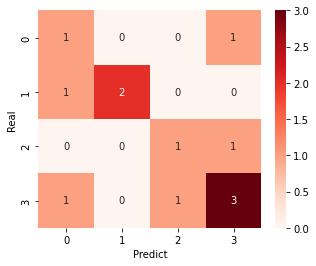

In [59]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_nav)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")


In [60]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 50.00%


In [61]:
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg=XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)


50.0
41.66666666666667
58.333333333333336


In [62]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
accuracy_score(y_test, y_pred_rf)*100


50.0

In [63]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


41.66666666666667

In [64]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test) 

accuracy_score(y_test, y_pred_lgr)*100

25.0